<a href="https://colab.research.google.com/github/Msougoud/grad_project/blob/main/AllPlants_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade tensorflow

     |████████████████████████████████| 462 kB 4.3 MB/s 


In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

!ls "/content/drive/My Drive"

Mounted at /content/drive
'Colab Notebooks'   models


In [ ]:
def folder_download(folder_id):
  from google.colab import auth
  auth.authenticate_user()
  from googleapiclient.discovery import build
  service = build('drive', 'v3');
  folder_name = service.files().get(fileId=folder_id).execute()['name']
  !wget  -qnc https://github.com/segnolin/google-drive-folder-downloader/raw/master/download.py
  from download import download_folder
  download_folder(service, folder_id, './', folder_name)
  return folder_name

In [ ]:
#download data container folder
folderid="1U_EplnsuODSx1uwRDnDnfGqbk69ph03Y"
folder_download(folderid)

1Lfuj9Fs5hMwtvb2jtpylF09CU-U2U3Mf crop diseaess.zip application/x-zip-compressed (1/1)
Download 100%.


'CROP DISEASES'

In [ ]:
!ls

 adc.json  'CROP DISEASES'   download.py   drive   __pycache__	 sample_data


In [ ]:
#unzip data to PlantsOriginal folder
!unzip "/content/CROP DISEASES/crop diseaess.zip" -d './PlantsOriginal/'

Streaming output truncated to the last 5000 lines.
  inflating: ./PlantsOriginal/Tomato/Tomato___Tomato_Yellow_Leaf_Curl_Virus/c91f5133-bf7a-4ebc-bfec-d996583a8052___YLCV_NREC 2663.JPG  
  inflating: ./PlantsOriginal/Tomato/Tomato___Tomato_Yellow_Leaf_Curl_Virus/c93faa39-15d1-4a73-98d5-40b0a897a893___YLCV_NREC 2913.JPG  
  inflating: ./PlantsOriginal/Tomato/Tomato___Tomato_Yellow_Leaf_Curl_Virus/c9485e8e-a59e-4dc0-b763-5f558cd9d8eb___YLCV_GCREC 2284.JPG  
  inflating: ./PlantsOriginal/Tomato/Tomato___Tomato_Yellow_Leaf_Curl_Virus/c95cd4be-4ab4-4c2a-aa8c-6ac66374e142___UF.GRC_YLCV_Lab 02769.JPG  
  inflating: ./PlantsOriginal/Tomato/Tomato___Tomato_Yellow_Leaf_Curl_Virus/c96787af-6b08-47e7-b1eb-f30d24ab8df1___YLCV_GCREC 2392.JPG  
  inflating: ./PlantsOriginal/Tomato/Tomato___Tomato_Yellow_Leaf_Curl_Virus/c97be94c-0d72-4ed3-8db8-1c3ba9414065___YLCV_NREC 2544.JPG  
  inflating: ./PlantsOriginal/Tomato/Tomato___Tomato_Yellow_Leaf_Curl_Virus/c99d2bdf-ec6d-486d-840a-bd90582208b7___YLCV_GCRE

In [ ]:
path = '/content/PlantsOriginal'

In [ ]:
import os
os.listdir(path)

['Tomato', 'Potato', 'grape']

In [ ]:

# define dataset , model directories
original_dataset_dir = path
base_dir = '/content/PlantsDataset'
models_dir = '/content/drive/MyDrive/models'

In [ ]:
## skip if a new dataset split isn't needed
def train_test_split(dir , start =0,split_ratio=.1):
  names = os.listdir(dir)
  img_num = len(names)
  train = []
  test = []
  if start < img_num-1:
      end = start + round(img_num*split_ratio)
      if end< img_num-1:
        test= names[start:end]
        train = names[:start]
        train += names[end:]
      else:
        test =  names[start:]
        train = names[:start]

  return train ,test

In [ ]:
## skip if a new dataset split is needed
import shutil
import os
from time import time


#use it if there is already directory

os.mkdir(base_dir)

split_ratio =.2
test_start = 0
start_time = time();
print('start copying and making files...')
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

categories = os.listdir(original_dataset_dir)

train_dirs= []
test_dirs=[]
#folders in train dir
for categ in categories:
  dir = os.path.join(train_dir, categ)
  os.mkdir(dir)
  train_dirs.append(dir)

#folders in test dir
for categ in categories:
  dir = os.path.join(test_dir, categ)
  os.mkdir(dir)
  test_dirs.append(dir)


original_directories = []
for categ in categories:
  org_dir = os.path.join(original_dataset_dir, categ);
  original_directories.append(org_dir);

k=0
for org_dir in original_directories:
  dirname = categories[k]
  i=0 
  print('started copying to train-', dirname)
  train , test = train_test_split(org_dir, 0,split_ratio)
  #health-train
  for img_name in train:
      fname = dirname+"_leaf_"+format(i)+'.jpg'
      src = os.path.join(org_dir, img_name)
      dst = os.path.join(train_dirs[k], fname)
      #shutil.copyfile(src, dst)
      shutil.copytree(src, dst)
      i+=1

  i=0    
  print('started copying to test-', dirname)
  #healthy-test
  for img_name in test:
      fname = dirname+"_leaf_"+format(i)+'.jpg'
      src = os.path.join(org_dir, img_name)
      dst = os.path.join(test_dirs[k], fname)
      #shutil.copyfile(src, dst)
      shutil.copytree(src, dst)
      i+=1
  k+=1



end_time = time();


duration =end_time - start_time;
print('this took about' , duration)

start copying and making files...
started copying to train- Tomato
started copying to test- Tomato
started copying to train- Potato
started copying to test- Potato
started copying to train- grape
started copying to test- grape
this took about 5.5937886238098145


In [ ]:
print(os.listdir("./PlantsDataset/train"))
print(os.listdir("./PlantsDataset/test"))

['Tomato', 'Potato', 'grape']
['Tomato', 'Potato', 'grape']


In [ ]:
# remove zip and original dataset to free up some space 
!rm -rf PlantsOriginal
!rm -rf DataSet
!ls

 adc.json	  download.py   PlantsDataset   sample_data
'CROP DISEASES'   drive         __pycache__


In [ ]:
##########################################################################################################################################################

In [ ]:

modelName = "VGG16_256_all_"
optimizerName = "sgd"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

from tensorflow.keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
IMG_SHAPE = (256, 256, 3)

In [ ]:

DIM = 256

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
     
        validation_split = .1,
        # set input mean to 0 over the dataset
        featurewise_center=False,
        # set each sample mean to 0
        samplewise_center=False,
        # divide inputs by std of dataset
        featurewise_std_normalization=False,
        # divide each input by its std
        samplewise_std_normalization=False,
        # apply ZCA whitening
        zca_whitening=False,
        # epsilon for ZCA whitening
        zca_epsilon=1e-06,
        # randomly rotate images in the range (deg 0 to 180)
        rotation_range=30,
        # randomly shift images horizontally
        width_shift_range=0.1,
        # randomly shift images vertically
        height_shift_range=0.1,
        # set range for random shear
        shear_range=0.,
        # set range for random zoom
        zoom_range=0.1,
        # set range for random channel shifts
        channel_shift_range=0.,
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        # value used for fill_mode = "constant"
        cval=0.,
        # randomly flip images
        horizontal_flip=True,
        # randomly flip images
        vertical_flip=False,
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format='channels_last'

)
validation_datagen = ImageDataGenerator(
                                        validation_split = .1,
    # set input mean to 0 over the dataset
        featurewise_center=False,
        # set each sample mean to 0
        samplewise_center=False,
        # divide inputs by std of dataset
        featurewise_std_normalization=False,
        # divide each input by its std
        samplewise_std_normalization=False,
        # apply ZCA whitening
        zca_whitening=False,
        # epsilon for ZCA whitening
        zca_epsilon=1e-06,
        # randomly rotate images in the range (deg 0 to 180)
        rotation_range=30,
        # randomly shift images horizontally
        width_shift_range=0.1,
        # randomly shift images vertically
        height_shift_range=0.1,
        # set range for random shear
        shear_range=0.,
        # set range for random zoom
        zoom_range=0.1,
        # set range for random channel shifts
        channel_shift_range=0.,
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        # value used for fill_mode = "constant"
        cval=0.,
        # randomly flip images
        horizontal_flip=True,
        # randomly flip images
        vertical_flip=False,
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format='channels_last'

                                        )
test_datagen = ImageDataGenerator()


In [ ]:
train_generator = train_datagen.flow_from_directory(
        base_dir+'/train',
        target_size=(DIM, DIM),
        batch_size=64,
        subset = 'training',
        shuffle=True
);
validation_generator = validation_datagen.flow_from_directory(
    base_dir+'/train',
    target_size=(DIM, DIM),
    batch_size=20,
    subset = 'validation')
testing_generator = test_datagen.flow_from_directory(
    base_dir+'/test',
    target_size=(DIM, DIM),
    batch_size=128)



Found 19409 images belonging to 3 classes.
Found 2155 images belonging to 3 classes.
Found 5065 images belonging to 3 classes.


In [ ]:
for data_batch, labels_batch in train_generator:
   print('data batch shape:', data_batch.shape)
   print('labels batch shape:', labels_batch.shape)
   break

data batch shape: (64, 256, 256, 3)
labels batch shape: (64, 3)


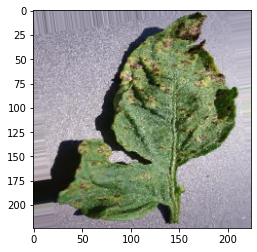

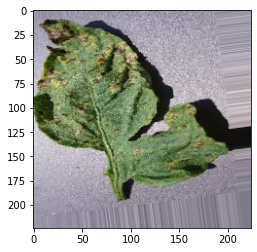

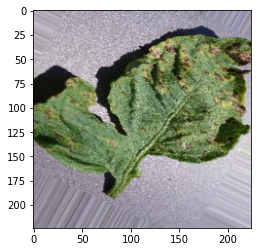

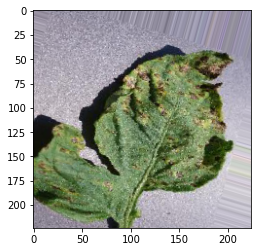

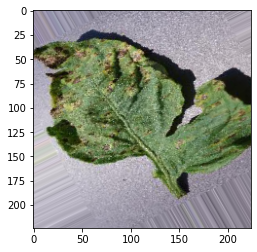

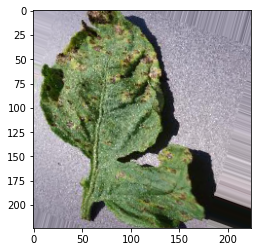

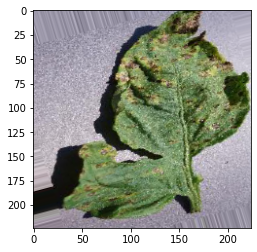

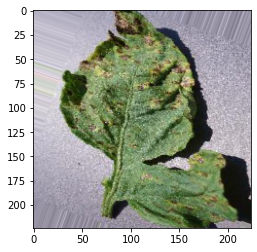

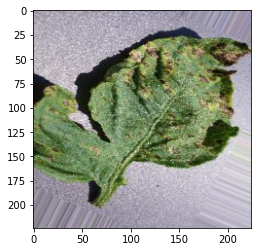

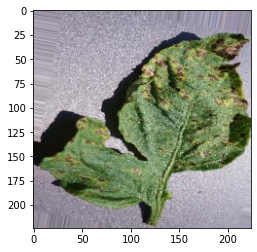

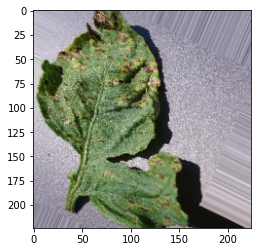

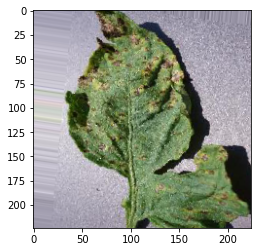

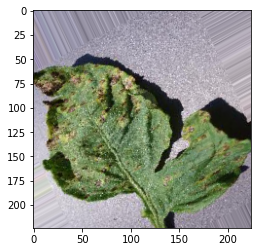

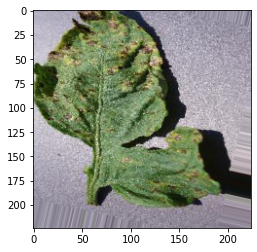

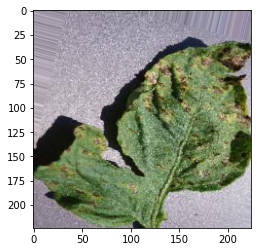

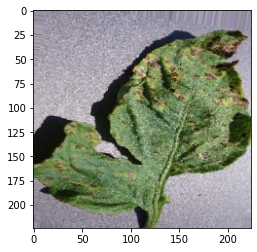

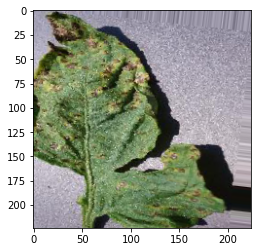

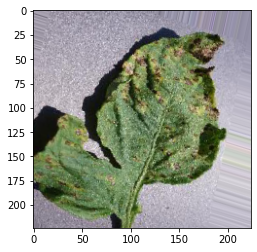

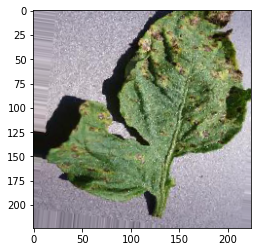

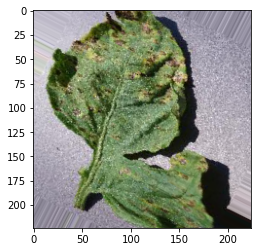

In [ ]:
# some augmentation examples
import os
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

numOfpicsViewed = 20

base_path= base_dir+'/train/Tomato/Tomato_leaf_0.jpg';
fnames = [os.path.join(base_path, fname) for fname in os.listdir(base_path)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(224, 224))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in train_datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i % numOfpicsViewed == 0:
    break

plt.show()

In [ ]:
from tensorflow.keras.applications import VGG16
top_model = VGG16(weights='imagenet',
include_top=False,
input_shape=(DIM, DIM, 3));


58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
top_model.trainable = False
set_trainable = False

In [ ]:
top_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
from tensorflow.keras import models,layers 
model = models.Sequential()
conv_base = top_model
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization());
model.add(layers.Dense(512,activation='relu') )
model.add(layers.Dense(256,activation='relu') )
model.add(layers.Dense(128,activation='relu') )
model.add(layers.Dropout(0.2))

model.add(layers.Dense(3 ,activation='softmax'))

In [ ]:
from tensorflow.keras import optimizers
model.compile(loss='categorical_crossentropy',
optimizer=optimizerName,
metrics=['acc'])

In [ ]:
filepath= models_dir +"/"+modelName+"_notrainable_"+optimizerName+"_weights.best.h5"

In [ ]:
#skip if training for the first time
model.load_weights(filepath)

OSError: ignored

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint(filepath , save_best_only = True ,monitor = 'val_acc',verbose=1,mode= 'max')
early_stopping = EarlyStopping(
monitor='val_acc',
patience=7,
)
callbacks_list = [checkpoint , early_stopping ]

history = model.fit_generator(
            train_generator,
            steps_per_epoch=100,
            epochs=30,
            callbacks=callbacks_list,
            validation_data=validation_generator,
            validation_steps=50
             )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  from ipykernel import kernelapp as app


Epoch 1/30
100/100 [==============================] - ETA: 0s - loss: 0.2472 - acc: 0.9209
Epoch 1: val_acc improved from -inf to 0.95000, saving model to /content/drive/MyDrive/models/VGG16_256_all__notrainable_sgd_weights.best.h5
100/100 [==============================] - 160s 1s/step - loss: 0.2472 - acc: 0.9209 - val_loss: 0.1496 - val_acc: 0.9500
Epoch 2/30
100/100 [==============================] - ETA: 0s - loss: 0.0740 - acc: 0.9808
Epoch 2: val_acc improved from 0.95000 to 0.97800, saving model to /content/drive/MyDrive/models/VGG16_256_all__notrainable_sgd_weights.best.h5
100/100 [==============================] - 145s 1s/step - loss: 0.0740 - acc: 0.9808 - val_loss: 0.0797 - val_acc: 0.9780
Epoch 3/30
100/100 [==============================] - ETA: 0s - loss: 0.0472 - acc: 0.9848
Epoch 3: val_acc improved from 0.97800 to 0.98200, saving model to /content/drive/MyDrive/models/VGG16_256_all__notrainable_sgd_weights.best.h5
100/100 [==============================] - 144s 1s/ste

In [ ]:
#unfreeze top model layers for training
#top_model.trainable =True;
#set_trainable = False
#
#for layer in top_model.layers:    
#layer.trainable = True

In [ ]:
#from tensorflow.keras import models,layers 
#model = models.Sequential()
#conv_base = top_model
#model.add(conv_base)
#model.add(layers.Flatten())
#model.add(layers.BatchNormalization());
#model.add(layers.Dense(512,activation='relu') )
#model.add(layers.Dense(256,activation='relu') )
#model.add(layers.Dense(128,activation='relu') )
#model.add(layers.Dropout(0.2))

#model.add(layers.Dense(26 ,activation='softmax'))

In [ ]:
## from tensorflow.keras import optimizers
## model.compile(loss='categorical_crossentropy',
## optimizer=optimizerName,
# metrics=['acc'])

In [ ]:
# filepath= models_dir+"/"+modelName+"_trainable_"+optimizerName+"_weights.best.h5"
# #filepath= "/content/drive/My Drive/PlantVillage-Dataset/raw/color/finished models/xception_sgd_99_4.h5"


In [ ]:

# #skip if training for the first time
# model.load_weights(filepath)

In [ ]:
#from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
#filepath= models_dir+"/"+modelName+"_trainable_"+optimizerName+"_weights.best.h5"
#checkpoint = ModelCheckpoint(filepath , save_best_only = True ,
 #                            monitor = 'val_acc',
  #                           save_weights_only=True,
   

   #                          verbose=1,mode= 'max')
#early_stopping = EarlyStopping(
#monitor='val_acc',
#patience=7,
#)
#callbacks_list = [checkpoint , early_stopping ]


In [ ]:
#history = model.fit_generator(
 #           train_generator,
  #          steps_per_epoch=100,
   #         epochs=30,
    ##        callbacks=callbacks_list,
      #      validation_data=validation_generator,
       #     )

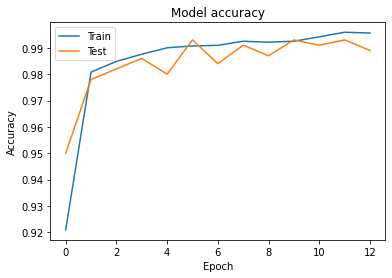

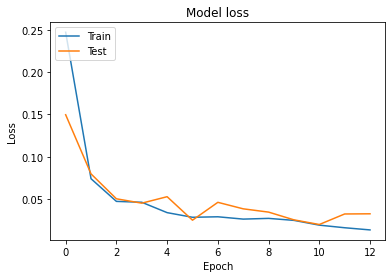

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss') 
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
################################################################### Testing ##############################################################################

In [ ]:
test_loss ,test_acc = model.evaluate_generator(testing_generator , steps = 50);
print('test acc: ', test_acc);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


test acc:  0.947482705116272


In [ ]:
#calculating percision & recall
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
counter=0
datapath = '/content/PlantsDataset/test'
categories = os.listdir(datapath)

targets=np.array([])
#intialize preds array with a 2 dimensional element bcoz it's expecting this shape,, delete element later
preds = np.array([[0,0,0]])
for categ in categories:
  subcateg_path = datapath + '/' + categ
  subcategs = os.listdir(subcateg_path)
  for subcateg in subcategs:
      categ_path = datapath+'/'+categ + '/' + subcateg
      print('categ is', categ)
      images = os.listdir(categ_path) 
      img_num = len(images)
      counter = 0
      for img in images:
          img = load_img(datapath+'/'+categ+"/"+ subcateg + '/' +img, target_size=(DIM, DIM))
          x = img_to_array(img)
          x = np.expand_dims(x, axis=0)
          pred = model.predict(x)
          preds=np.concatenate((preds, pred))
          print(preds)
          targets =np.append(targets,categ)
          counter+=1
          if counter%img_num==0:
              print("[INFO]:{} images loaded".format(counter))

Streaming output truncated to the last 5000 lines.
 [1.11343121e-04 9.99809086e-01 7.95812230e-05]
 [1.20761753e-04 9.99868751e-01 1.05158288e-05]
 ...
 [9.54844296e-01 3.83722186e-02 6.78346260e-03]
 [4.14409250e-01 5.85026741e-01 5.63979964e-04]
 [8.82620215e-01 9.85058770e-02 1.88738070e-02]]
[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.11343121e-04 9.99809086e-01 7.95812230e-05]
 [1.20761753e-04 9.99868751e-01 1.05158288e-05]
 ...
 [4.14409250e-01 5.85026741e-01 5.63979964e-04]
 [8.82620215e-01 9.85058770e-02 1.88738070e-02]
 [4.84932140e-02 9.51407313e-01 9.94964139e-05]]
[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.11343121e-04 9.99809086e-01 7.95812230e-05]
 [1.20761753e-04 9.99868751e-01 1.05158288e-05]
 ...
 [8.82620215e-01 9.85058770e-02 1.88738070e-02]
 [4.84932140e-02 9.51407313e-01 9.94964139e-05]
 [7.74778128e-01 2.23989412e-01 1.23250543e-03]]
[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.11343121e-04 9.99809086e-01 7.95812230e-05]
 [1.20761753e-04 9.

In [ ]:
# make a copy of preds h
vals = preds

In [ ]:

# delete element added at intializer
preds = np.delete(preds ,0,0)

In [ ]:
# see indx to class mappings
idx_to_cls = {v: k for k, v in testing_generator.class_indices.items()}
idx_to_cls

{0: 'Potato', 1: 'Tomato', 2: 'grape'}

In [ ]:
preds_cls_idx = preds.argmax(axis=-1)
preds_cls = np.vectorize(idx_to_cls.get)(preds_cls_idx)

In [ ]:
y_preds = preds_cls
y_true = targets

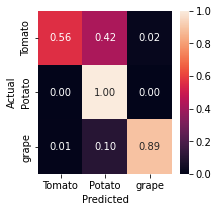

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_true, y_preds)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(3,3))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=categories, yticklabels=categories)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)


In [ ]:

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(3, 3))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [ ]:
print(len(y_true))
print(len(y_preds))

5065
5065


              precision    recall  f1-score   support

      Potato       0.99      0.56      0.72       500
      Tomato       0.94      1.00      0.97      4142
       grape       0.98      0.89      0.93       423

    accuracy                           0.95      5065
   macro avg       0.97      0.82      0.87      5065
weighted avg       0.95      0.95      0.94      5065



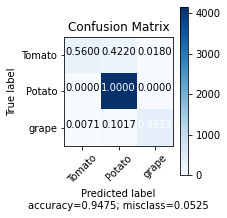

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,f1_score, precision_score, recall_score, accuracy_score

cm=confusion_matrix(y_true, y_preds)
#print(cm)
print(classification_report(y_true, y_preds))
plot_confusion_matrix(cm=cm, 
                      normalize    = True,
                      target_names = categories,
                      title        = "Confusion Matrix")

In [ ]:
print(y_preds)
print(y_true)

['Tomato' 'Tomato' 'Tomato' ... 'grape' 'Tomato' 'grape']
['Tomato' 'Tomato' 'Tomato' ... 'grape' 'grape' 'grape']


In [ ]:
import numpy as np
f1 = f1_score(y_true, y_preds, average="weighted")
p=precision_score(y_true, y_preds, average="weighted")
r=recall_score(y_true, y_preds, average="weighted")  
print(f1)
print(p)
print(r)
print(accuracy_score(y_true, y_preds))



0.9418794513111076
0.9497557791700627
0.9474827245804541
0.9474827245804541


In [ ]:
img_path = '/content/PlantsDataset/train/grape/grape_leaf_0.jpg';

img = os.listdir(img_path)[4]
# We preprocess the image into a 4D tensor
from tensorflow.keras.preprocessing import image
import numpy as np

img = image.load_img(img_path +"/"+img, target_size=(256, 256))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
# Remember that the model was trained on inputs
# that were preprocessed in the following way:
img_tensor /= 255.

# Its shape is (1, 150, 150, 3)
print(img_tensor.shape)

(1, 256, 256, 3)


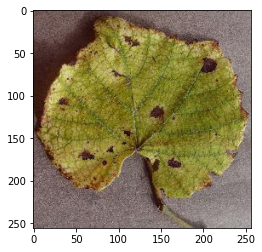

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()